In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
airbnb = pd.read_csv('airbnb_FINAL.csv', index_col=0)

In [3]:
# Getting dummy variable dataframes
neighborhood_dum = pd.get_dummies(airbnb.neighbourhood_cleansed, drop_first=True)
borough_dum = pd.get_dummies(airbnb.borough, drop_first=True)
property_dum = pd.get_dummies(airbnb.property_type, drop_first=True)
room_dum = pd.get_dummies(airbnb.room_type, drop_first=True)
cancel_dum = pd.get_dummies(airbnb.cancellation_policy, drop_first=True)

In [4]:
airbnb.head()

,review_10,review_9or10,review_scores_value,superhost,host_days,host_days.1,response_rate,host_listings_count,host_verifications,host_pic,id_verified,neighbourhood_cleansed,borough,property_type,room_type,accommodates,bathrooms,bedrooms,beds,real_bed,amenities,price,sec_dep,cleaning_fee,extra_people,guests_included,minimum_nights,maximum_nights,number_of_reviews,instant_bookable,business_travel_ready,cancellation_policy,lat,lon,galleries,rats
0,1,1,10,0,1416.0,1416.0,100,1.0,6,1,0,Lower East Side,Manhattan,Apartment,Private room,2,1.0,1.0,1.0,1,16,90,100.0,60.0,25,1,2,15,20,0,0,strict_14_with_grace_period,40.72017,-73.98412,20,11023
1,0,1,9,1,2088.0,2088.0,100,1.0,4,1,1,Greenwich Village,Manhattan,Apartment,Entire home/apt,6,2.0,3.0,4.0,1,30,615,0.0,200.0,5,4,3,1125,52,1,0,strict_14_with_grace_period,40.73372,-73.99704,102,4290
2,1,1,10,1,1474.0,1474.0,100,8.0,6,1,0,Greenpoint,Brooklyn,Apartment,Entire home/apt,4,1.0,1.0,2.0,1,20,90,0.0,0.0,0,1,30,120,6,0,0,strict_14_with_grace_period,40.72074,-73.94320,4,3727
3,1,1,10,0,1484.0,1484.0,57,1.0,6,1,0,Kips Bay,Manhattan,Apartment,Private room,1,1.0,1.0,1.0,1,22,110,100.0,80.0,20,1,30,1125,3,1,0,strict_14_with_grace_period,40.74075,-73.98162,14,781
4,1,1,10,0,2509.0,2509.0,100,1.0,6,1,1,Chelsea,Manhattan,Apartment,Entire home/apt,3,1.0,0.0,2.0,1,39,220,0.0,90.0,0,1,4,1125,15,0,0,strict_14_with_grace_period,40.75206,-73.99346,117,1511


In [5]:
# y and y2 are two different definitions of the classification problem, y being that which classifies a 'good' listing
# as a listing with a 10 rating and y2 that which classifies a good listing as one with a 9 or a 10 rating.
airbnb.drop(airbnb.columns[0], axis=1)
y = airbnb[airbnb.columns[0]]
y2 = airbnb[airbnb.columns[1]]
X = airbnb[airbnb.columns[3:]]

In [6]:
X = X.drop(['host_days','host_verifications','host_pic','bathrooms','real_bed','business_travel_ready','number_of_reviews','response_rate','host_listings_count','extra_people','id_verified'], axis=1)
Xcsv = X
X = X.drop(['lat','lon'], axis=1)

In [7]:
# Dropping categoricals
X = X.drop('neighbourhood_cleansed', axis=1)
X = X.drop('borough', axis=1)
X = X.drop('property_type', axis=1)
X = X.drop('room_type', axis=1)
X = X.drop('cancellation_policy', axis=1)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, precision_score, accuracy_score

In [9]:
X_train, X_test, y_train, y_test, y2_train, y2_test, neighb_train, neighb_test, borough_train, borough_test, prop_train, prop_test, room_train, room_test, cancel_train, cancel_test, Xcsv_train, Xcsv_test = train_test_split(X, y, y2, neighborhood_dum, borough_dum, property_dum, room_dum, cancel_dum, Xcsv, test_size=0.3, stratify=y, random_state=42)
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)
X_train = pd.DataFrame(X_train_sc, index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(X_test_sc, index=X_test.index, columns=X_train.columns)

In [10]:
X_train_f = pd.merge(X_train, borough_train, how='left', left_index=True, right_index=True)
X_train_f = pd.merge(X_train_f, room_train, how='left', left_index=True, right_index=True)
X_train_f = pd.merge(X_train_f, cancel_train, how='left', left_index=True, right_index=True)

X_test_f = pd.merge(X_test, borough_test, how='left', left_index=True, right_index=True)
X_test_f = pd.merge(X_test_f, room_test, how='left', left_index=True, right_index=True)
X_test_f = pd.merge(X_test_f, cancel_test, how='left', left_index=True, right_index=True)

In [11]:
rfc = RandomForestClassifier(n_estimators = 100, min_samples_leaf=15, max_features=10)
rfc2 = RandomForestClassifier(n_estimators = 100, min_samples_leaf=15, max_features=10)

In [12]:
X_tr, X_val, y_tr, y_val, y2_tr, y2_val = train_test_split(X_train_f, y_train, y2_train, test_size=0.3, random_state=40)

In [13]:
rfc.fit(X_tr, y_tr);
rfc2.fit(X_tr, y2_tr);

In [14]:
def make_confusion_matrix(model, X_test_values, y_test_values, threshold=0.5):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_predict = (model.predict_proba(X_test_values)[:, 1] >= threshold)
    confusion = confusion_matrix(y_test_values, y_predict)
    plt.figure(dpi=150)
    sns.heatmap(confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='g');
    plt.xlabel('Prediction')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')

In [15]:
from ipywidgets import interactive, FloatSlider

interactive(lambda threshold: make_confusion_matrix(rfc, X_val, y_val, threshold), threshold=(0.0,1.0,0.02))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.02), Output()), _dom_cla…

In [16]:
from ipywidgets import interactive, FloatSlider

interactive(lambda threshold: make_confusion_matrix(rfc2, X_val, y2_val, threshold), threshold=(0.0,1.0,0.02))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.02), Output()), _dom_cla…

In [17]:
pred1_proba = rfc.predict_proba(X_val)
pred1 = (rfc.predict_proba(X_val)[:, 1] >= 0.5)


pred2_proba = rfc2.predict_proba(X_val)
pred2 = (rfc2.predict_proba(X_val)[:, 1] >= 0.85)

In [18]:
# Metrics for whether or not a listing is rated 10
roc_auc1 = roc_auc_score(y_val, pred1_proba[:,1])
acc1 = accuracy_score(y_val, pred1)
prec1 = precision_score(y_val, pred1)
print(f'Model 1 roc_auc: {roc_auc1}\nModel 1 accuracy: {acc1}\nModel 1 precision: {prec1}')

Model 1 roc_auc: 0.7216411816223636
Model 1 accuracy: 0.6548478192657672
Model 1 precision: 0.6815823605706874


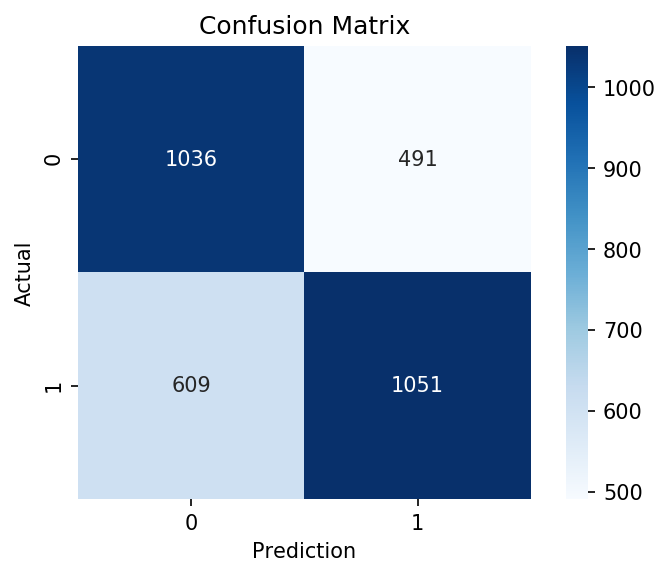

In [19]:
make_confusion_matrix(rfc, X_val, y_val, 0.5)

In [20]:
# Metrics for whether or not a listing is rated 9 or 10
roc_auc2 = roc_auc_score(y2_val, pred2_proba[:,1])
acc2 = accuracy_score(y2_val, pred2)
prec2 = precision_score(y2_val, pred2)
print(f'Model 2 roc_auc: {roc_auc2}\nModel 2 accuracy: {acc2}\nModel 2 precision: {prec2}')

Model 2 roc_auc: 0.8190730827993273
Model 2 accuracy: 0.8136178224035143
Model 2 precision: 0.9501582278481012


In [66]:
def make_confusion_matrix2(model, X_test_values, y_test_values, threshold=0.5):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_predict = (model.predict_proba(X_test_values)[:, 1] >= threshold)
    confusion = confusion_matrix(y_test_values, y_predict)
    plt.figure(dpi=1000)
    sns.heatmap(confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='g');
    plt.xlabel('Prediction')
    plt.ylabel('Actual', rotation=360)
    plt.title('Confusion Matrix: Threshold 0.85')
    plt.savefig('conf_matrix.png')

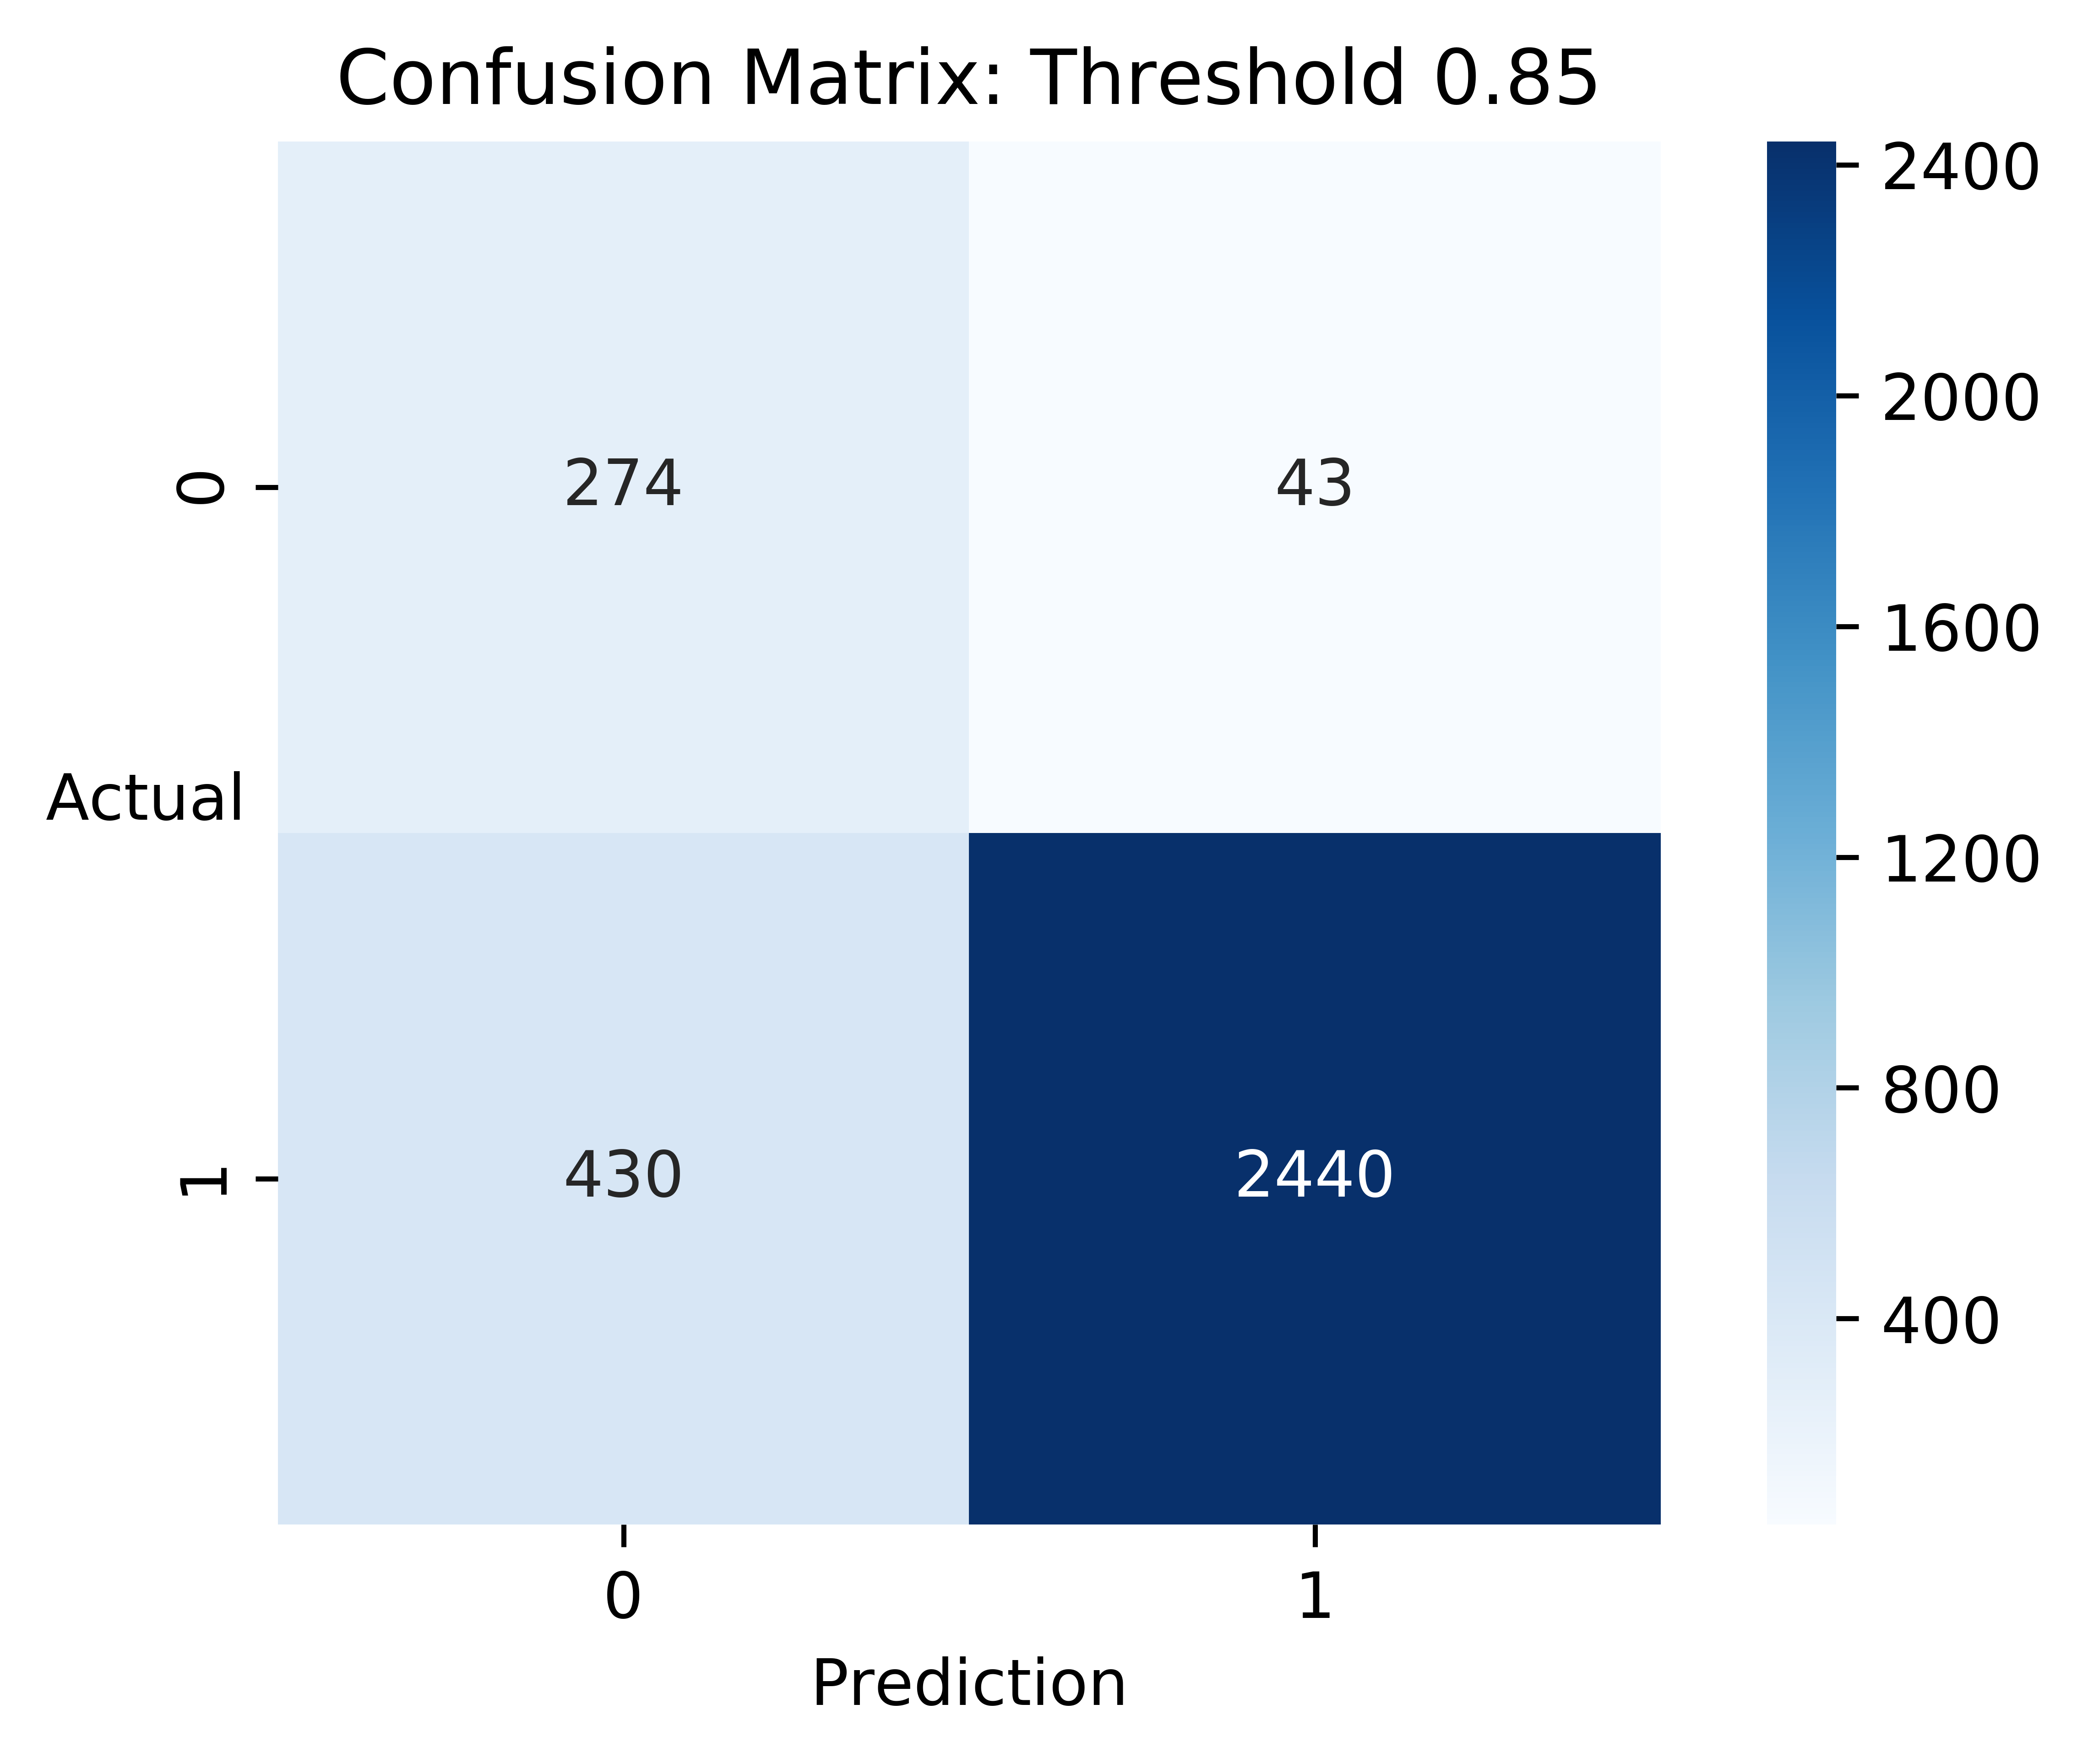

In [67]:
make_confusion_matrix2(rfc2, X_val, y2_val, 0.85)

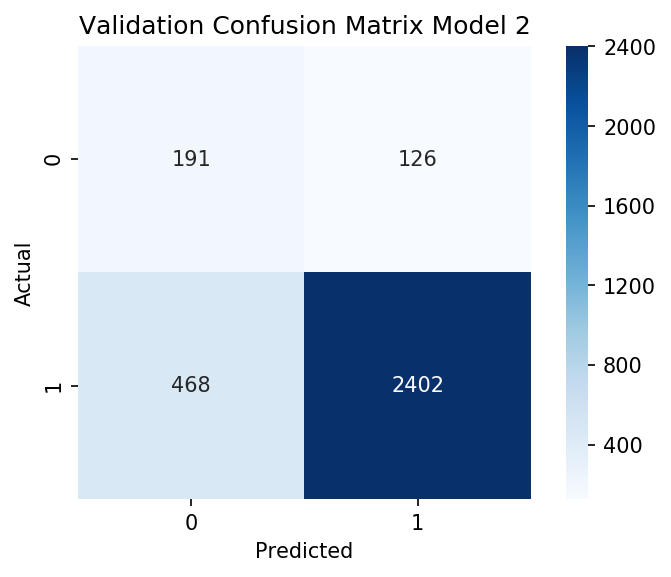

In [22]:
# Print confusion matrix
confusion = confusion_matrix(y2_val, pred2)
plt.figure(dpi=150)
sns.heatmap(confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='g')
           #xticklabels=iris_dataset['target_names'],
           #yticklabels=iris_dataset['target_names'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Validation Confusion Matrix Model 2');

**Fitting and applying the models to the test data**

In [23]:
rfc.fit(X_train_f, y_train);
rfc2.fit(X_train_f, y2_train);

(array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
        27.]), <a list of 27 Text xticklabel objects>)

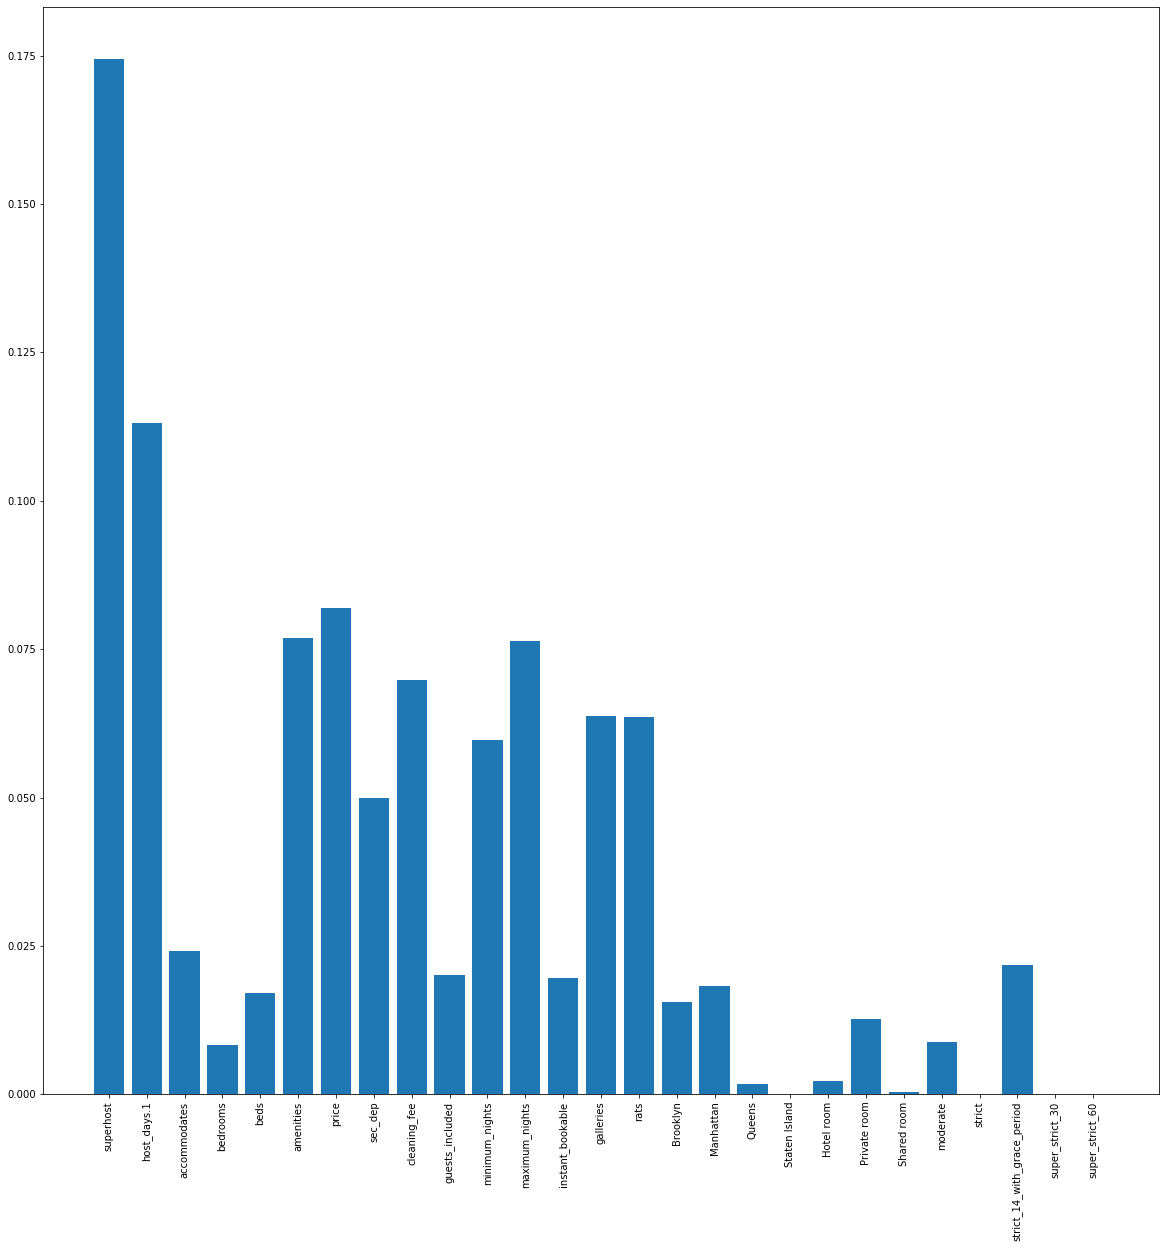

In [43]:
# Displaying relative feature importance
plt.figure(figsize=(20,20))
plt.bar(np.linspace(1,len(X_train_f.columns),len(X_train_f.columns)),rfc.feature_importances_, tick_label=X_train_f.columns)
plt.xticks(rotation=90)


In [24]:
pred1_proba = rfc.predict_proba(X_test_f)
pred1 = (rfc.predict_proba(X_test_f)[:, 1] >= 0.5)


pred2_proba = rfc2.predict_proba(X_test_f)
pred2 = (rfc2.predict_proba(X_test_f)[:, 1] >= 0.85)

In [25]:
# Metrics for whether or not a listing is rated 10
roc_auc1 = roc_auc_score(y_test, pred1_proba[:,1])
acc1 = accuracy_score(y_test, pred1)
prec1 = precision_score(y_test, pred1)
print(f'Model 1 roc_auc: {roc_auc1}\nModel 1 accuracy: {acc1}\nModel 1 precision: {prec1}')

Model 1 roc_auc: 0.7208673012886679
Model 1 accuracy: 0.6527564243356029
Model 1 precision: 0.6705935659265972


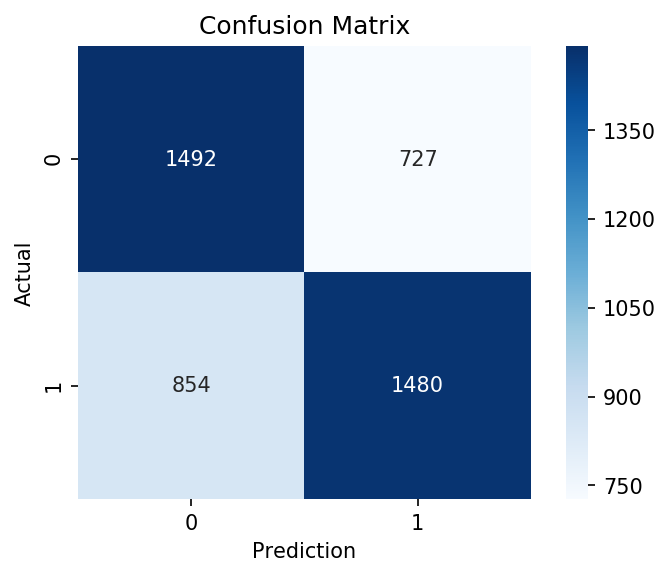

In [26]:
make_confusion_matrix(rfc, X_test_f, y_test, 0.5)

In [27]:
# Metrics for whether or not a listing is rated 9 or 10
roc_auc2 = roc_auc_score(y2_test, pred2_proba[:,1])
acc2 = accuracy_score(y2_test, pred2)
pred2 = precision_score(y2_test, pred2)
print(f'Model 2 roc_auc: {roc_auc2}\nModel 2 accuracy: {acc2}\nModel 2 precision: {prec2}')

Model 2 roc_auc: 0.8151778690227391
Model 2 accuracy: 0.8034263123215463
Model 2 precision: 0.9501582278481012


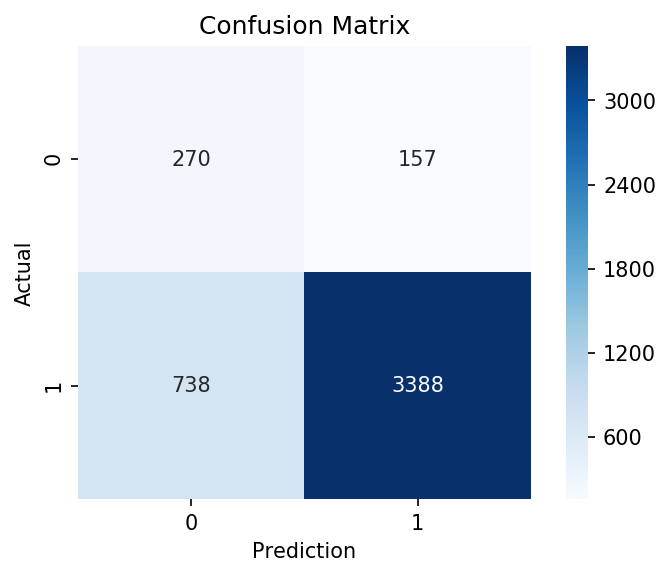

In [28]:
make_confusion_matrix(rfc2, X_test_f, y2_test, 0.85)

In [29]:
Pred1_Proba = pd.DataFrame(pred1_proba[:,1], index=y_test.index, columns=['Model1_pred_proba'])
Pred2_Proba = pd.DataFrame(pred2_proba[:,1], index=y_test.index, columns=['Model2_pred_proba'])

Xcsv_test = pd.merge(Xcsv_test, Pred1_Proba, how='left', left_index=True, right_index=True)
Xcsv_test = pd.merge(Xcsv_test, Pred2_Proba, how='left', left_index=True, right_index=True)

In [30]:
Xcsv_test.head()

,superhost,host_days.1,neighbourhood_cleansed,borough,property_type,room_type,accommodates,bedrooms,beds,amenities,price,sec_dep,cleaning_fee,guests_included,minimum_nights,maximum_nights,instant_bookable,cancellation_policy,lat,lon,galleries,rats,Model1_pred_proba,Model2_pred_proba
2001,0,2121.0,Murray Hill,Manhattan,Apartment,Entire home/apt,2,1.0,1.0,34,177,500.0,130.0,2,30,1125,1,strict_14_with_grace_period,40.74472,-73.97205,11,1801,0.299097,0.597679
14533,1,1676.0,Park Slope,Brooklyn,Apartment,Entire home/apt,2,0.0,1.0,19,120,200.0,90.0,1,2,180,1,strict_14_with_grace_period,40.66989,-73.98757,3,4391,0.659352,1.000000
246,0,809.0,Bedford-Stuyvesant,Brooklyn,Townhouse,Entire home/apt,8,3.0,4.0,27,170,0.0,160.0,4,2,17,0,strict_14_with_grace_period,40.68884,-73.92958,3,22526,0.414897,0.905506
8778,0,3687.0,Bedford-Stuyvesant,Brooklyn,Apartment,Entire home/apt,2,1.0,1.0,21,110,500.0,90.0,2,7,365,0,strict_14_with_grace_period,40.68111,-73.95591,1,9933,0.493950,0.897032
7248,0,164.0,Chelsea,Manhattan,Apartment,Entire home/apt,4,0.0,2.0,17,115,750.0,150.0,2,30,182,0,strict_14_with_grace_period,40.74765,-73.99298,117,1511,0.289208,0.595414


In [31]:
# Export data for visualization

Xcsv_test.to_csv('test_data.csv')